Graphs & Nodes:
Show synergy between either feats, classes, or other, where the node-size is relative to the amount of the class, and the edges
thickness relative to the amount that have both instances.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'Barbarian': 43,
 'Fighter': 115,
 'Rogue': 52,
 'Wizard': 30,
 'Bard': 28,
 'Paladin': 18,
 'Warlock': 37,
 'Sorcerer': 24,
 'Cleric': 64,
 'Monk': 25,
 'Druid': 17,
 'Ranger': 17,
 'Revised Ranger': 9,
 'Artificer': 1,
 'Mystic': 1}

Name: 
Type: Graph
Number of nodes: 64
Number of edges: 2055
Average degree:  64.2188


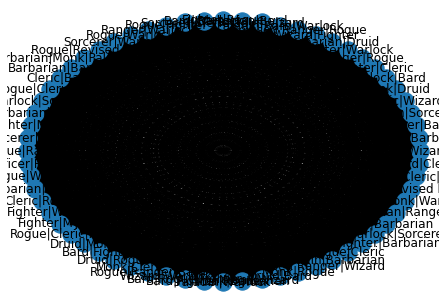

In [146]:
import networkx as nx
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import re

DnDChars = '../charTable.tsv'
character_data = pd.read_csv(DnDChars, sep='\t')
class_data = character_data[['justClass']]


drop_class_duplicates = class_data.drop_duplicates()
unique_classes = [c for c in drop_class_duplicates['justClass'] if "|" not in c]
unique_classes.sort()



edges_classes = [c for c in character_data['justClass'] if "|" in c]

    
import itertools 
  
def product(str1): 
    
    return [x for x in itertools.product(list(str1))] 
  
    
    
#print(product(edges_classes))
#all_combinations = []

#for i in edges_classes:
    #all_combinations = product(i)

    
#print(all_combinations)



separated_list = []
for i in edges_classes:
    row = i.split("|")
    for r in row:
        separated_list.append(r)

class_occurrences = {}

for occ in separated_list:
    if occ in class_occurrences:
        class_occurrences[occ] +=1
    else:
        class_occurrences[occ] =1
    
    

#edges = []
#row = edges_classes[0].split("|")
#for idx_one in range(len(row)):
    #for idx_two in range(idx_one+1,len(row)):
        #edges.append((row[idx_one], row[idx_two]))

#print(edges)

edges = []
row = []
for q in edges_classes:
    q.split("|")
    row.append(q)
    for idx_one in range(len(row)):
        for idx_two in range(idx_one+1,len(row)):
            edges.append((row[idx_one], row[idx_two]))
            
print(edges)

    
    
display(class_occurrences)
G = nx.Graph()
#G.add_nodes_from(class_occurrences.keys())
G.add_edges_from(edges)
print(nx.info(G))
nx.draw_circular(G, with_labels=True)

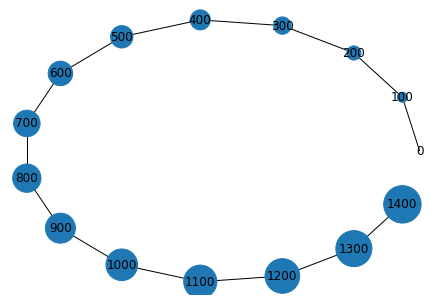

In [140]:
import sys, networkx as nx, matplotlib.pyplot as plt

# Create a list of 10 nodes numbered [0, 9]
nodes = range(len(class_occurrences.keys()))
node_sizes = []
labels = {}
for n in nodes:
        node_sizes.append( 100 * n )
        labels[n] = 100 * n

# Node sizes: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

# Connect each node to its successor
edges = [ (i, i+1) for i in range(len(nodes)-1) ]

# Create the graph and draw it with the node labels
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

nx.draw_circular(g, node_size = node_sizes, labels=labels, with_labels=True)    
plt.show()